# Normalizing Flows

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tomo_challenge import load_data, load_redshift

Found classifier Random
Found classifier ZotBin
Found classifier RandomForest
Found classifier IBandOnly


In [3]:
from zotbin.group import plotfbins
from zotbin.flow import learn_flow

In [4]:
bands='riz'
include_colors=False
include_errors=False

In [5]:
train_file='/media/data2/tomo_challenge_data/ugrizy_buzzard/training.hdf5'
train_data = load_data(train_file, bands, 
                       errors=include_errors,
                       colors=include_colors, array=True)
train_z = load_redshift(train_file)
print(f'Loaded {len(train_data)} training rows.')

Loaded 5410171 training rows.


/home/dkirkby/DESC/tomo/tomo_challenge/data.py:89: UserWarning: Setting inf (undetected) bands to mag=30
  warnings.warn("Setting inf (undetected) bands to mag=30")


In [6]:
detected = np.all(train_data != 30, axis=1)
print(f'Removing {np.count_nonzero(~detected)} galaxies with undetected flux in at least one band.')
train_data = train_data[detected]
train_z = train_z[detected]

Removing 50677 galaxies with undetected flux in at least one band.


Use r-i, z-i, i as the features:

In [7]:
X = np.concatenate((np.diff(train_data, axis=1), train_data[:, 1:2]), axis=1)

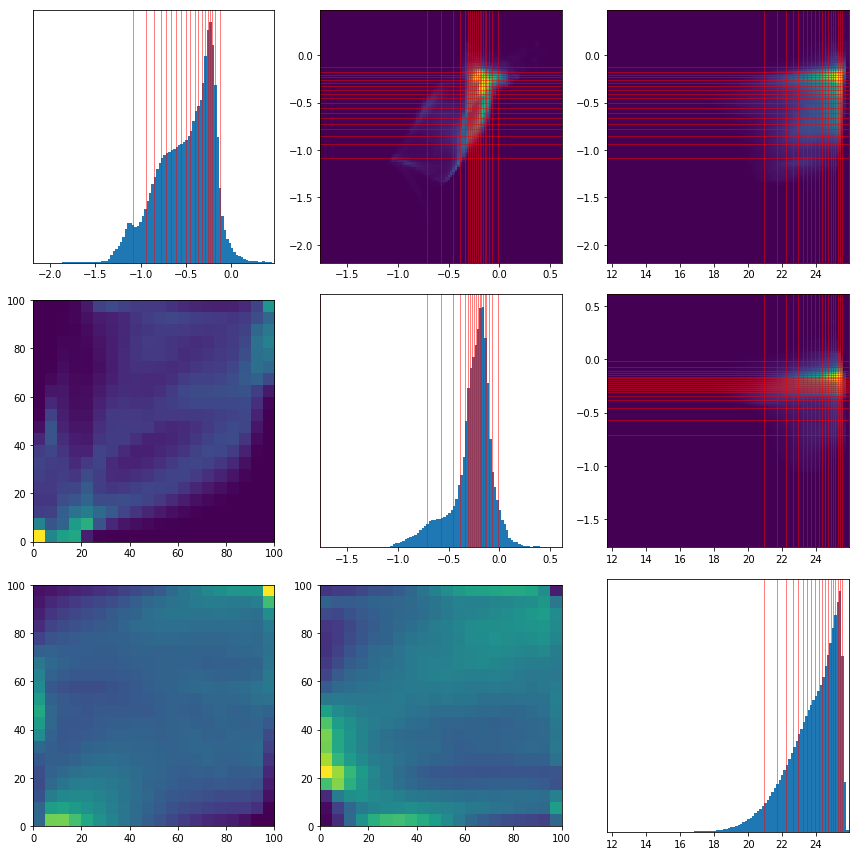

In [8]:
plotfbins(X, inset_pct=0)

epoch 25 loss 3.266


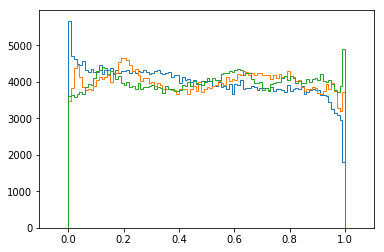

epoch 50 loss 3.256


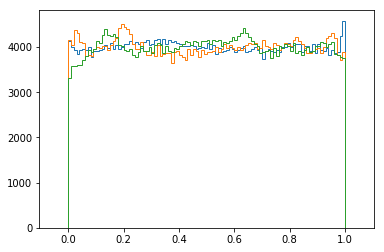

epoch 75 loss 3.230


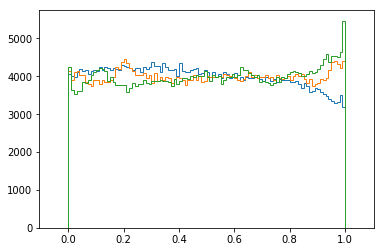

epoch 100 loss 3.233


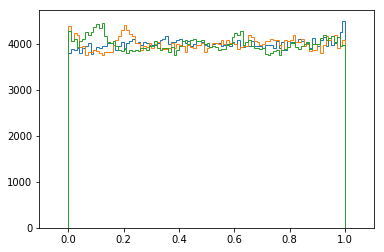

epoch 125 loss 3.203


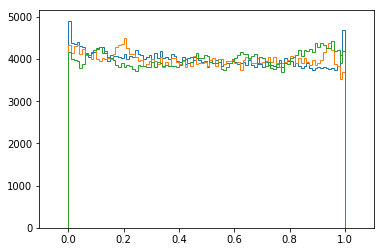

epoch 150 loss 3.245


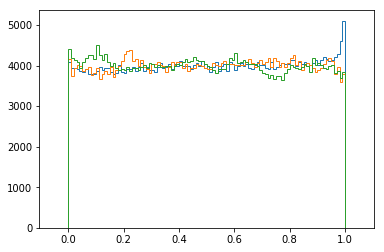

epoch 175 loss 3.215


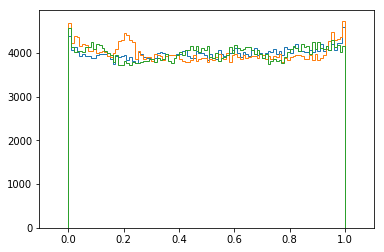

epoch 200 loss 3.228


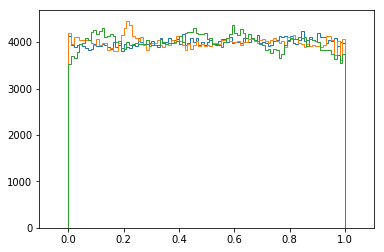

CPU times: user 1min 40s, sys: 7.66 s, total: 1min 48s
Wall time: 1min 16s


In [9]:
%time flow_map = learn_flow(X[:400000], num_epochs=200, batch_size=4000, learning_rate=1e-3, interval=25)

In [10]:
%time U = flow_map(X)

CPU times: user 8.52 s, sys: 991 ms, total: 9.52 s
Wall time: 3.4 s


In [11]:
np.all(np.isfinite(U))

True

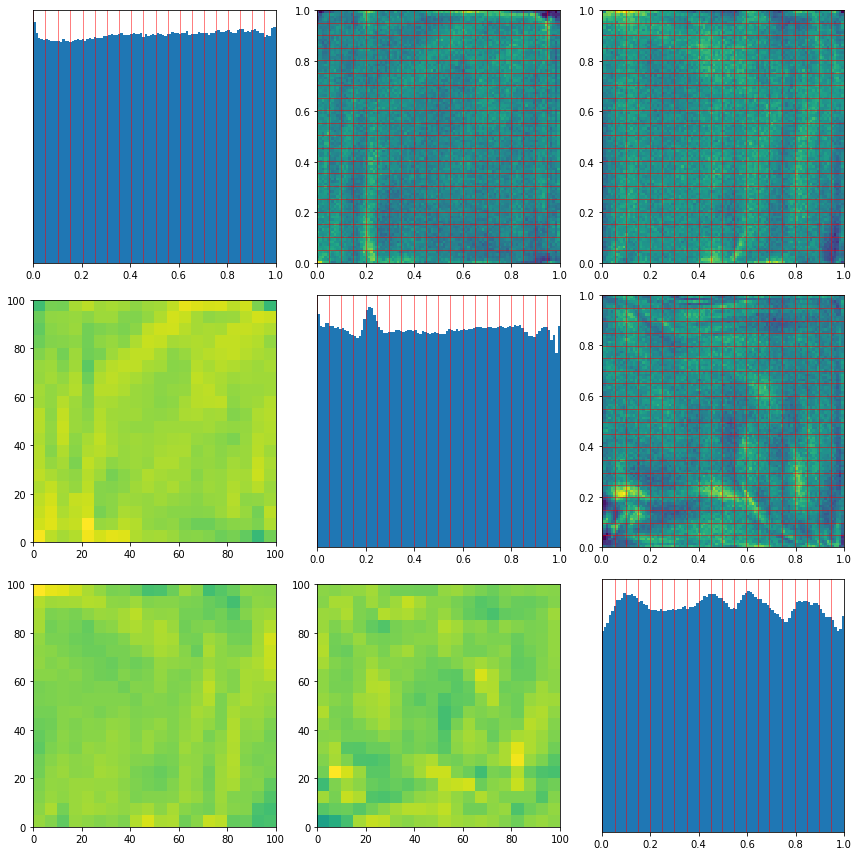

In [12]:
plotfbins(U, inset_pct=0)

In [13]:
np.savez('uniform_buz_riz.npz', uniform=U, redshift=train_z, detected=detected)

In [14]:
!ls -lh uniform_buz_riz.npz

-rw-rw-r-- 1 dkirkby dkirkby 169M Sep  8 17:55 uniform_buz_riz.npz
